In [1]:
import pandas as pd
file_path = "./ref/인천교통공사역별일별이용인원현황20240630.csv"
df = pd.read_csv(file_path,encoding="euc-kr")
df.head()
# data.tail()

,호선,통행일자,역명,이용인원,승차인원,하차인원
0,1,2023-07-01,계양,6115,2931,3184
1,1,2023-07-01,귤현,1634,779,855
2,1,2023-07-01,박촌,5319,2816,2503
3,1,2023-07-01,임학,11591,5880,5711
4,1,2023-07-01,계산,17098,8585,8513


In [2]:
columns = ['num', 'date', 'name' ,'total','in' , 'out']
df.columns = columns
df = df.loc[:,:'total']

In [3]:
df.head()

,num,date,name,total
0,1,2023-07-01,계양,6115
1,1,2023-07-01,귤현,1634
2,1,2023-07-01,박촌,5319
3,1,2023-07-01,임학,11591
4,1,2023-07-01,계산,17098


In [4]:
data = df.groupby(['num' , 'date', 'name']) . sum() .reset_index()
# data[data['date'] == '2025-01-01']
data

,num,date,name,total
0,1,2023-07-01,간석오거리,16249
1,1,2023-07-01,갈산,9145
2,1,2023-07-01,경인교대입구,8796
3,1,2023-07-01,계산,17098
4,1,2023-07-01,계양,6115
...,...,...,...,...
22687,7,2024-06-30,굴포천,9792
22688,7,2024-06-30,부평구청,6592
22689,7,2024-06-30,산곡,8687
22690,7,2024-06-30,삼산체육관,5477


In [5]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'], ascending=[True,False])
gdata.head(10)

,name,date,total
20835,가재울,2024-06-30,3272
20808,가재울,2024-06-29,4631
20781,가재울,2024-06-28,8461
20754,가재울,2024-06-27,8476
20727,가재울,2024-06-26,8677
20700,가재울,2024-06-25,8845
20673,가재울,2024-06-24,8399
20646,가재울,2024-06-23,3668
20619,가재울,2024-06-22,4450
20592,가재울,2024-06-21,8827


In [6]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가재울,2466644
1,가정(루원시티),7244306
2,가정중앙시장,4066391
3,간석오거리,7011229
4,갈산,5696797
5,검단사거리,5491245
6,검단오류(검단산업단지),1645870
7,검바위,2095807
8,검암,2621807
9,경인교대입구,3679245


In [7]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(20)
total_data = sdata[:20]
total_data

,name,total
51,인천터미널,9621793
53,작전,9123660
26,부평구청,9035404
28,부평시장,8579746
42,예술회관,7672424
58,테크노파크,7409439
1,가정(루원시티),7244306
3,간석오거리,7011229
10,계산,6871043
33,석남(거북시장),6791663


In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path ="./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

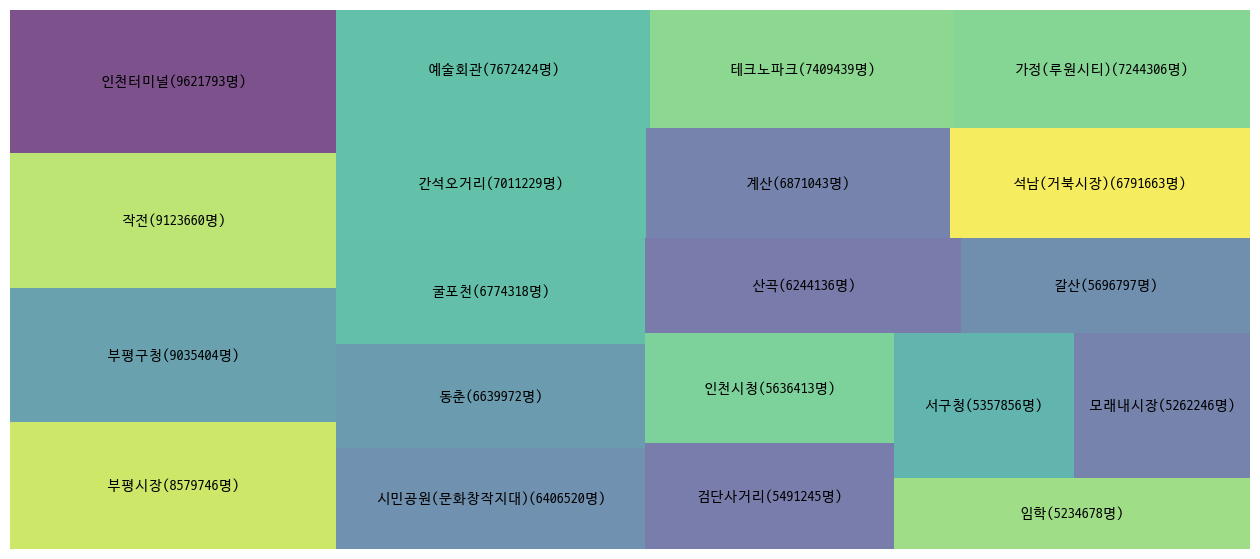

In [9]:
import squarify
plt.figure(figsize=(16,7))
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip(total_data['name'],total_data['total'])], alpha= 0.7)
plt.rcParams['font.size'] = 10
# plt.rcParams['text.color']='blue'
plt.gca().invert_yaxis() # 축 뒤집기
plt.axis("off") # 축 인덱스 없애기
plt.show()